# 2  H SAF Root-zone Soil wetness index products
## 2.1  Overview

The root-zone soil wetness index (SWI) products are available in Near Real-Time (NRT) or as Climate Data Record (CDR) daily products. The main difference between the two product groups is that the NRT products are produced within 12-36 hours of the analysis time. We recommend using the new 10 km resolution NRT product RZSM-ASCAT-NRT-10km as the 25 km resolution version (SM-DAS-2) will be retired by the end of 2022. The CDR root-zone SM (RZSM) represents a consistent long-term data record, which is extended annually. The latest data record RZSM-DR2019-10km (H141) was produced with ERA-5 atmospheric forcing over 1992-2018 and the offline extension RZSM-DR-EXT-10km (H142) is updated annually from 2019-2021 (the 2021 data will be released in Q1/2022). The following table summarises the different products:   

<h2 style='padding: 10px'>NRT and data record RSM products</h2><table class='table table-striped'> <thead> <tr> <th>Product name</th> <th>Type</th> <th>Period</th> <th>Obs assimilated</th> <th>DA system</th> <th>Resolution</th> <th>QC flags</th> </tr> </thead> <tbody> <tr> <th scope='row'>SM-DAS-2 (H14) </th> <td>NRT</td> <td>2012-2022 (discontinued after 2022)</td> <td> ASCAT-A/B SSM products (equivalent to H102/H103) </td> <td> Regular updates of H SAF/ECMWF LDAS (47R2-) </td> <td> 25 km </td> <th> Yes (1=normal, 2=frozen risk, 3=outide nominal range)  </th> </tr> <tr> <th scope='row'>RZSM-ASCAT-NRT-10km (H26) </th> <td>NRT</td> <td>09/2021 onwards</td> <td> ASCAT-A/B/C SSM products (equivalent to H102/H103/H105) </td> <td> Regular updates of H SAF/ECMWF LDAS (47R2-) </td> <td> 10 km </td> <th> Yes (1=normal, 2=frozen risk, 3=outide nominal range)  </th> </tr> <tr> <th scope='row'>RZSM-DR2019-10km (H141)</th> <td>Data record</td> <td>1992-2018</td> <td> ERS 1/2 (1992-2006) and ASCAT-A/B (2007-2018) reprocessed SSM </td> <td> 46R1 of offline H SAF/ECMWF LDAS with ERA5 forcing </td>  <td>10 km</td> <th> None </tr> <th scope='row'>RZSM-DR-EXT-10km (H142)</th> <td>Offline extension</td> <td>2019-2021</td> <td> ASCAT-A/B/C (2019-2021) reprocessed SSM </td> <td> 46R1 of offline H SAF/ECMWF with ERA5 forcing </td>  <td>10 km</td> <th> None </tr> </tbody> </table>

Both RZSM-ASCAT-NRT-10km and RZSM-DR2019-10km products are provided in netCDF4 regular lat/lon format. Using python software such as netCDF4, matplotlib and cartopy it is straightforward to read in and plot the netCDF4 data directly. We will demonstrate some simple examples. 

## 2.1  Requirements:
- python version 3.6
- The following libraries: numpy, netCDF4, xarray, pandas, matplotlib, cartopy
- A miniconda script has been provided on github, which sets up a local environment and downloads the relevant libraries for all the soil moisture examples: 
(TBC)
- The miniconda script can be run in linux or mac




## 2.2  Downloading and visualizing the RZSM-ASCAT-NRT-10km NRT root-zone soil wetness index product and the RZSM-DR2019-10km data record product
In this exercise we will 

-  Download the netCDF files from H SAF ftp
-  Read the data in python
-  Plot the data in python
-  Plot a particular region
-  Plot a time series

### 2.2.1 Downloading the netCDF4 files from H SAF ftp
In order to access the H SAF ftp you will need to register:
https://hsaf.meteoam.it/User/Register. 
You will then be given a username and password for reading data from the H SAF ftp. For easy access and download from the ftp is it best to use software such as filezilla (https://filezilla-project.org/). Alternatively, to download example file RZSM-ASCAT-NRT-10km (H26) for 06/09/2021 from the terminal type:

ftp user@ftphsaf.meteoam.it

password: (type your password)

cd /products/h26/h26_cur_mon_nc

get h26_2021090600_R01.nc

exit

### 2.2.2 Producing a global plot of RZSM-ASCAT-NRT-10km using cartopy

In [1]:
import numpy as np #for grid/data manipulation
import matplotlib.pyplot as plt #For plotting figures
from netCDF4 import Dataset
import cartopy.crs as ccrs

In [18]:
#Read in grib data for 06/5/2019:
SM =Dataset("./RZSM_files/h26_2021090600_R01.nc")
#Depth integrated RZSM (layer 1 (var40) = 0.07 m, layer 2 (var41) = 0.21 m, layer 3 (var42) = 0.72 m depth)
RZSM=SM["var40"][0,:,:]*0.07+SM["var41"][0,:,:]*0.21+SM["var42"][0,:,:]*0.72
qc=SM["var200"][0,:,:] #Quality control flag (1=normal, 2=risk of frozen conditions, 3=outside nominal range"

### 2.2.3 Plot regular gridded data with cartopy

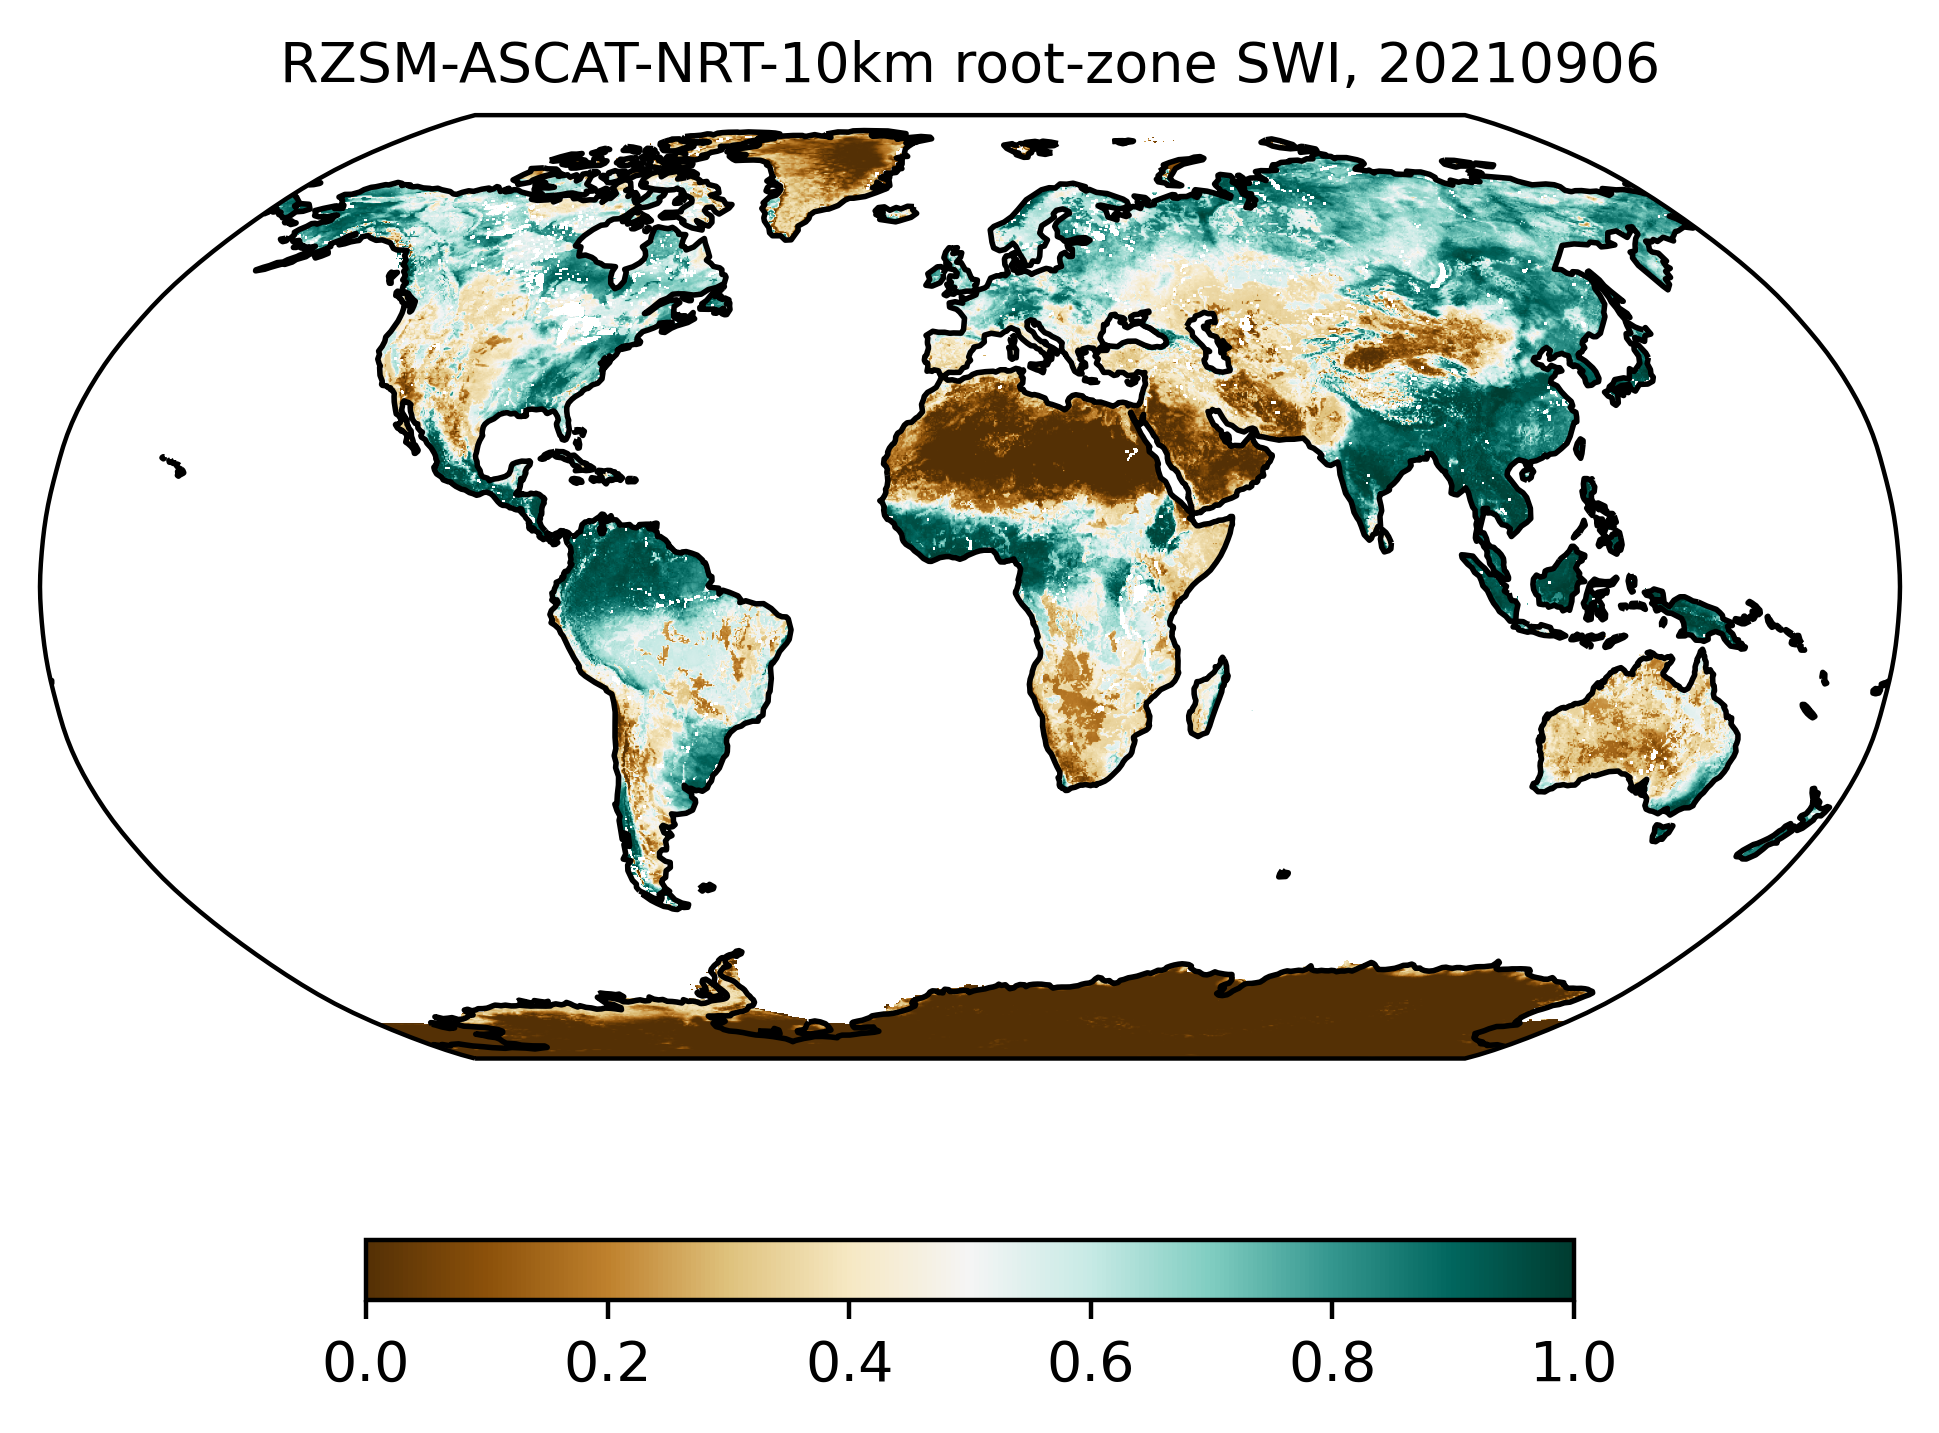

In [19]:

fig = plt.figure
plt.rcParams['figure.dpi'] = 400
cmap=plt.cm.get_cmap('BrBG') #Choose colour map type 
ax = plt.axes(projection=ccrs.Robinson()) #Choose projection
ax.coastlines() 
#Plot image with cartopy:
im = ax.imshow(RZSM,origin='upper',cmap=cmap,extent=[0.0,360.,-90,90],transform=ccrs.PlateCarree())
plt.gcf().colorbar(im,ax=ax,orientation='horizontal',fraction=0.05); plt.title("RZSM-ASCAT-NRT-10km root-zone SWI, 20210906",fontsize=10)
plt.savefig('Cartopy_plot.png',dpi=300,bbox_inches='tight') #To save in png format
plt.show()
plt.close()

(1, 1801, 3600) (1801, 3600)


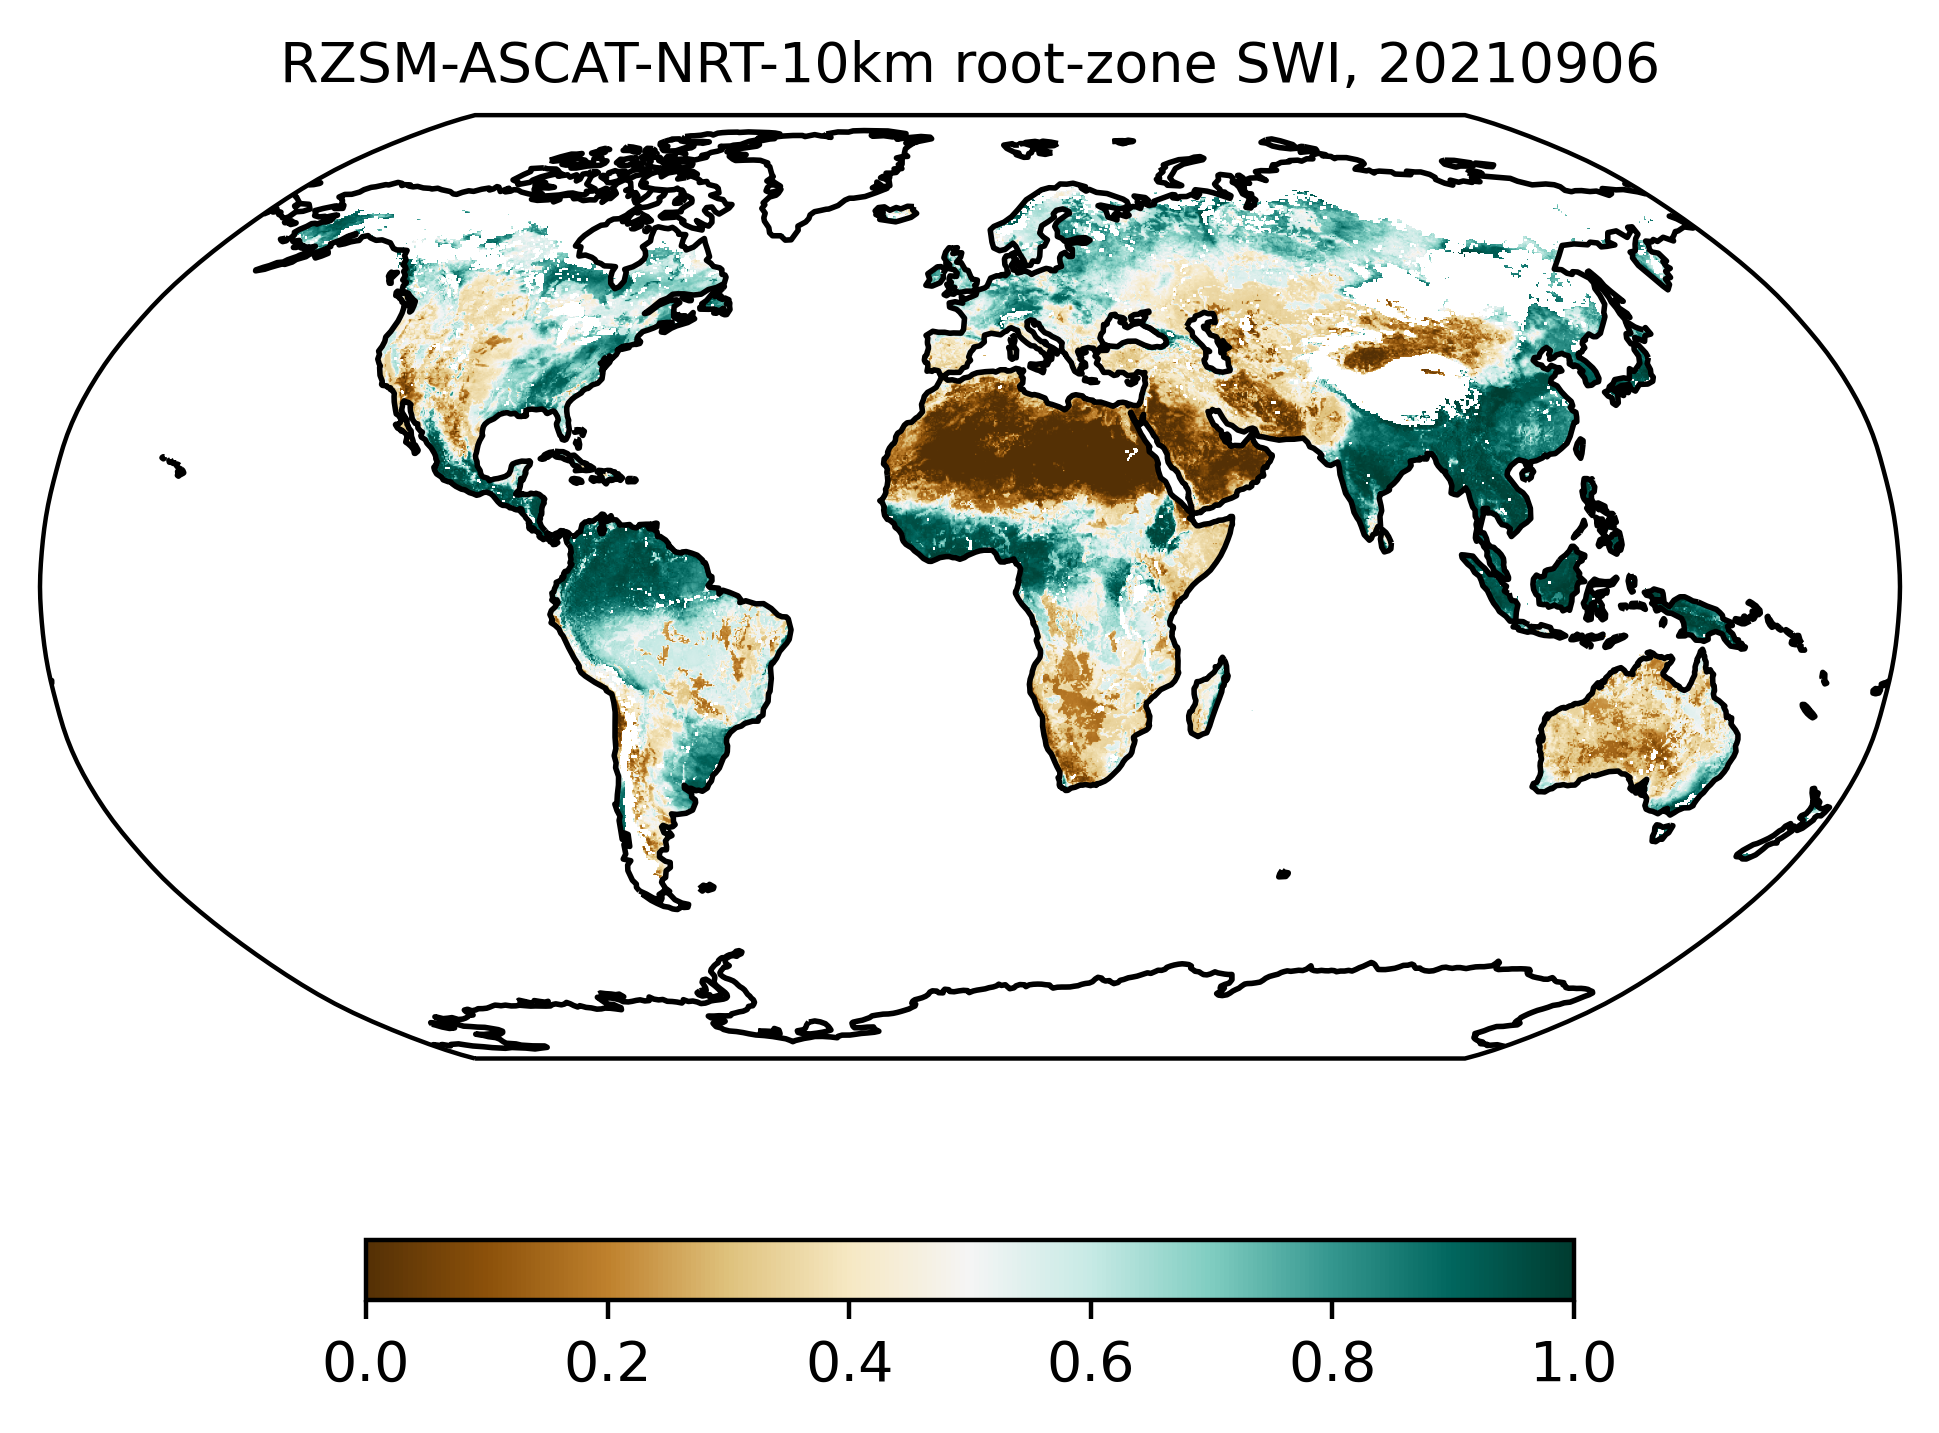

In [23]:
#Repeat the plot while masking frozen data
fig = plt.figure
plt.rcParams['figure.dpi'] = 400
cmap=plt.cm.get_cmap('BrBG') #Choose colour map type 
ax = plt.axes(projection=ccrs.Robinson()) #Choose projection
ax.coastlines() 

print(qc.shape, RZSM.shape)

RZSM[qc[0,:,:]>1.0]=np.nan

#Plot image with cartopy:
im = ax.imshow(RZSM,origin='upper',cmap=cmap,extent=[0.0,360.,-90,90],transform=ccrs.PlateCarree())
plt.gcf().colorbar(im,ax=ax,orientation='horizontal',fraction=0.05); plt.title("RZSM-ASCAT-NRT-10km root-zone SWI, 20210906",fontsize=10)
plt.savefig('Cartopy_plot.png',dpi=300,bbox_inches='tight') #To save in png format
plt.show()
plt.close()


### 2.2.4 Producing a regional plot over Europe

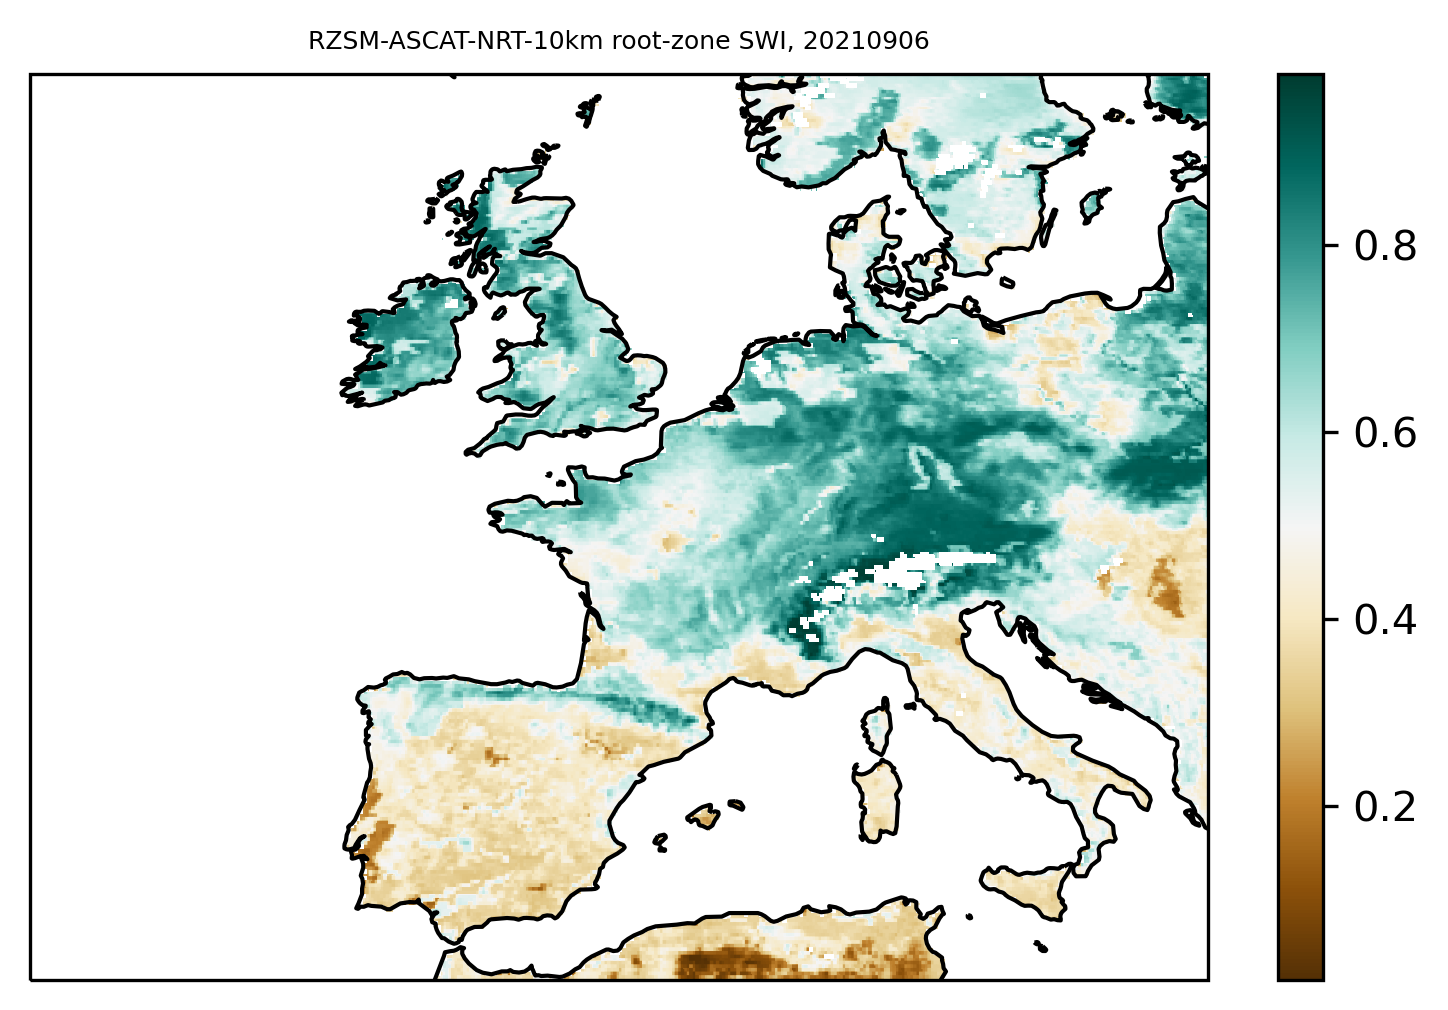

In [24]:
fig = plt.figure
plt.rcParams['figure.dpi'] = 300
cmap=plt.cm.get_cmap('BrBG') #Choose colour map type 

ax = plt.axes(projection=ccrs.Robinson())
extent = [-20, 20, 35, 60] #Define the extent (min lon, max lon, min lat, max lat)
ax.set_extent(extent)
ax.coastlines() 

im = ax.imshow(RZSM,origin='upper',cmap=cmap,extent=[0.0,360.,-90,90],transform=ccrs.PlateCarree())
plt.gcf().colorbar(im,ax=ax,orientation='vertical',fraction=0.04); 
plt.title("RZSM-ASCAT-NRT-10km root-zone SWI, 20210906",fontsize=6)
plt.show()
plt.close()



### 2.2.5 Producing a time series of root-zone SM 

In [25]:
#Import relevant libraries:
#Import libraries
import xarray as xr
import numpy as np #for grid/data manipulation
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

#Firstly, download grib files for the soil moisture data records covering the period of interest 
# In this example, we will use H141 grib files for April/May 2010. 

#Define the analysis period (Spring 2016): 
analysis_period = ['2010-04-01','2010-05-31']

#Define the pandas date range:
data_range = pd.date_range(analysis_period[0], analysis_period[1])

#Pandas dataframe for time series (3 columns for soil moisture layers)
SM_df_layer=pd.DataFrame(np.empty((data_range.size,3),data_range))


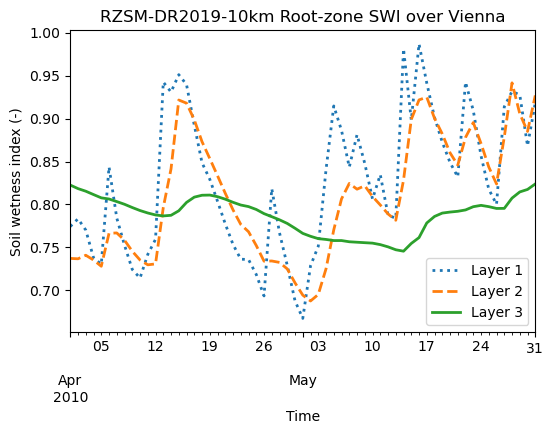

In [26]:
#Create the time series
#Read in root-zone SWI over Vienna over the analysis period
lat,lon = "48.1","16.4"

#Loop over days in time series:
for days, d in zip(data_range,range(len(data_range))):

  #Read in soil moisture from directory where grib files are stored:  
  SM = xr.open_dataset("RZSM_files/H141_files/h141_"+str(days.year)+'%02d'%(days.month)+'%02d'%(days.day)+'00_R01.nc', decode_cf=False)
  SM_df_layer.iloc[d,0]=np.array(SM["var40"].sel(lat=lat,lon=lon,method="nearest")[0])
  SM_df_layer.iloc[d,1]=np.array(SM["var41"].sel(lat=lat,lon=lon,method="nearest")[0])
  SM_df_layer.iloc[d,2]=np.array(SM["var42"].sel(lat=lat,lon=lon,method="nearest")[0])

SM_df_layer=SM_df_layer.astype("float")

#Plot time series    
#Set the index equal to the date-range
SM_df_layer.index=data_range
SM_df_layer.iloc[:,0].plot(label='Layer 1',style=':',legend='True',linewidth=2.0) 
SM_df_layer.iloc[:,1].plot(label='Layer 2',style='--',legend='True',linewidth=2.0)
SM_df_layer.iloc[:,2].plot(label='Layer 3',legend='True',linewidth=2.0)
plt.xlabel('Time'); plt.ylabel('Soil wetness index (-)'); 
plt.title('RZSM-DR2019-10km Root-zone SWI over Vienna'); 
plt.show()
plt.close()

### 2.2.6 Other resources

- The soon to be retired NRT product (SM-DAS-2) is only available in grib format. More information on reading and visualizing SM-DAS-2 can be found on the previous workshop page: https://github.com/H-SAF/hsaf_hepex_workshop_2019/tree/master/SoilMoistureCluster 

- The CM-SAF R toolbox is highly recommended for working with the data record products, including climate trends analysis. Please follow the EUMETSAT training course for the RZSM-DR2019-10km data record:
https://training.eumetsat.int/course/view.php?id=404

### Summary

- There are 4 different root-zone SWI products currently available:
    - SM-DAS-2: Global near-real-time 25 km resolution (retired end of 2022)
    - RZSM-ASCAT-NRT-10km: Global near-real-time 10 km resolution
    - RZSM-DR2019-10km: Global data record (1992-2018) 10 km resolution
    - RZSM-DR-EXT-10km: Offline extension of RZSM-DR2019-10km (2019-2021)
- Cartopy is recommended for plotting maps in python and Pandas is a useful tool for time series
- It is recommended to use the CM-SAF R toolbox for climate trends analyses of the data records